# 1. Loading and exploration of Data

IMDB Dataset can be downloaded from here.

Dataset overview:

In [1]:
# get IMDB Dataset: http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!wget http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz

--2024-02-08 14:06:54--  http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘aclImdb_v1.tar.gz’

aclImdb_v1.tar.gz   100%[===================>]  80.23M  22.1MB/s    in 5.1s    

2024-02-08 14:06:59 (15.7 MB/s) - ‘aclImdb_v1.tar.gz’ saved [84125825/84125825]



In [2]:
# extract downloaded files
!tar xvzf aclImdb_v1.tar.gz

Streaming output truncated to the last 5000 lines.
aclImdb/train/unsup/44983_0.txt
aclImdb/train/unsup/44982_0.txt
aclImdb/train/unsup/44981_0.txt
aclImdb/train/unsup/44980_0.txt
aclImdb/train/unsup/44979_0.txt
aclImdb/train/unsup/44978_0.txt
aclImdb/train/unsup/44977_0.txt
aclImdb/train/unsup/44976_0.txt
aclImdb/train/unsup/44975_0.txt
aclImdb/train/unsup/44974_0.txt
aclImdb/train/unsup/44973_0.txt
aclImdb/train/unsup/44972_0.txt
aclImdb/train/unsup/44971_0.txt
aclImdb/train/unsup/44970_0.txt
aclImdb/train/unsup/44969_0.txt
aclImdb/train/unsup/44968_0.txt
aclImdb/train/unsup/44967_0.txt
aclImdb/train/unsup/44966_0.txt
aclImdb/train/unsup/44965_0.txt
aclImdb/train/unsup/44964_0.txt
aclImdb/train/unsup/44963_0.txt
aclImdb/train/unsup/44962_0.txt
aclImdb/train/unsup/44961_0.txt
aclImdb/train/unsup/44960_0.txt
aclImdb/train/unsup/44959_0.txt
aclImdb/train/unsup/44958_0.txt
aclImdb/train/unsup/44957_0.txt
aclImdb/train/unsup/44956_0.txt
aclImdb/train/unsup/44955_0.txt
aclImdb/train/unsup/4

In [3]:
# After extraction, folder aclImdb contains two folders as follows:
#  * train
#     * pos reviews
#     * neg reviews
#  * test
#     * pos reviews
#     * neg reviews

import os

def fetch_reviews(path):
  data = []
  #path = 'aclImdb/train/pos/'
  files = [f for f in os.listdir(path)]
  for file in files:
    with open(path+file, "r", encoding='utf8') as f:
      data.append(f.read())

  return data

In [4]:
import pandas as pd
import matplotlib.pyplot as plt


df_train_pos = pd.DataFrame({'review': fetch_reviews('aclImdb/train/pos/'), 'label': 1})
df_train_neg = pd.DataFrame({'review': fetch_reviews('aclImdb/train/neg/'), 'label': 0})

df_test_pos = pd.DataFrame({'review': fetch_reviews('aclImdb/test/pos/'), 'label': 1})
df_test_neg = pd.DataFrame({'review': fetch_reviews('aclImdb/test/neg/'), 'label': 0})

# Merging all df's for data cleaning and preprocessing step.
df = pd.concat([df_train_pos, df_train_neg, df_test_pos, df_test_neg], ignore_index=True)
print("Total reviews in df: ", df.shape)
df.head()

Total reviews in df:  (50000, 2)


,review,label
0,"In an alternate 1950s, where an outbreak of th...",1
1,"Well, if you are open-minded enough to have li...",1
2,"I saw the film twice in the space of one week,...",1
3,An old man who lives in the mountains wakes up...,1
4,Spoiler for anyone who is lucky enough to ever...,1


In [5]:
# No null values in dataset.
print(df['review'].isnull().sum())
print("Total Number of positive reviews in data: ", df[df['label']==1].shape[0])
print("Total Number of negative reviews in data: ", df[df['label']==0].shape[0])

0
Total Number of positive reviews in data:  25000
Total Number of negative reviews in data:  25000


Positive reviews are labeled as 1 and negative as 0.

### Sample positive review:

In [6]:
# sample positive movie review
df[df['label']==1].sample(n=1)['review'].iloc[0]

'If you repeat a lie enough number of times will it become the truth? 15 park avenue is the story of an alternative reality of a schizophrenic (Mithi). The movie is about her search for her home at a fictitious address where her imaginary husband and 5 children live. Aparna Sen delivers yet another masterpiece. Each and every actor of the movie was better than the other. Konkona Sen looks unbelievably convincing as a schizophrenic. She pulls off the role with such ease and maturity beyond her age. Shabana Azmi is incredible as usual. She plays the dominating and fiercely independent elder sister of Mithi who takes care of her ailing sister and aging mother. She refuses to accept that in-spite of all her strength and courage, she still feels lonely at times. This should have been a very easy movie for Rahul Bose. The role was least bit demanding and anyone could have done the role.<br /><br />The ending of the movie was the most surreal part of the whole park avenue experience. It took 

### Sample negative review:

In [7]:
# sample negative review
df[df['label']==0].sample(n=1)['review'].iloc[0]

'Ronald Colman won a Best Actor Oscar for showy performance as a popular stage thespian who completely loses himself in his roles, particularly as Shakespeare\'s Othello. Critically-lauded George Cukor film has a marvelous pedigree, having been written by the estimable team of Ruth Gordon and Garson Kanin. Unfortunately, the witty banter comes off as self-conscious here, and the backstage business is overripe. Miklós Rózsa also won an Oscar for his score, and Shelley Winters has a few fine moments a tough waitress (when theatrical Colman breathlessly addresses her, she asks him, "What are ya? Some kind of nut?"). Otherwise, this scenario is awfully obvious, surprisingly draggy, and not very funny. *1/2 from ****'

In [8]:
# word_count in reviews
word_counts = df['review'].apply(lambda x: len(x.split()))

word_counts.describe()

count    50000.000000
mean       231.156940
std        171.343997
min          4.000000
25%        126.000000
50%        173.000000
75%        280.000000
max       2470.000000
Name: review, dtype: float64

In [12]:
!pip install nltk

#2. Data preprocessing

In [14]:
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

stop_words = stopwords.words('english') # defining stop_words
stop_words.remove('not') # removing not from the stop_words list as it contains value in negative movies
lemmatizer = WordNetLemmatizer()

def data_preprocessing(review):

  # data cleaning
  review = re.sub(re.compile('<.*?>'), '', review) #removing html tags
  review =  re.sub('[^A-Za-z0-9]+', ' ', review) #taking only words

  # lowercase
  review = review.lower()

  # tokenization
  tokens = nltk.word_tokenize(review) # converts review to tokens

  # stop_words removal
  review = [word for word in tokens if word not in stop_words] #removing stop words

  # lemmatization
  review = [lemmatizer.lemmatize(word) for word in review]

  # join words in preprocessed review
  review = ' '.join(review)

  return review

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [15]:
df['preprocessed_review'] = df['review'].apply(lambda review: data_preprocessing(review))
df.head()

,review,label,preprocessed_review
0,"In an alternate 1950s, where an outbreak of th...",1,alternate 1950s outbreak undead caused mysteri...
1,"Well, if you are open-minded enough to have li...",1,well open minded enough liked barber shop like...
2,"I saw the film twice in the space of one week,...",1,saw film twice space one week time cinema orpi...
3,An old man who lives in the mountains wakes up...,1,old man life mountain wake one morning loses c...
4,Spoiler for anyone who is lucky enough to ever...,1,spoiler anyone lucky enough ever see film not ...


#Positive Reviews Wordcloud

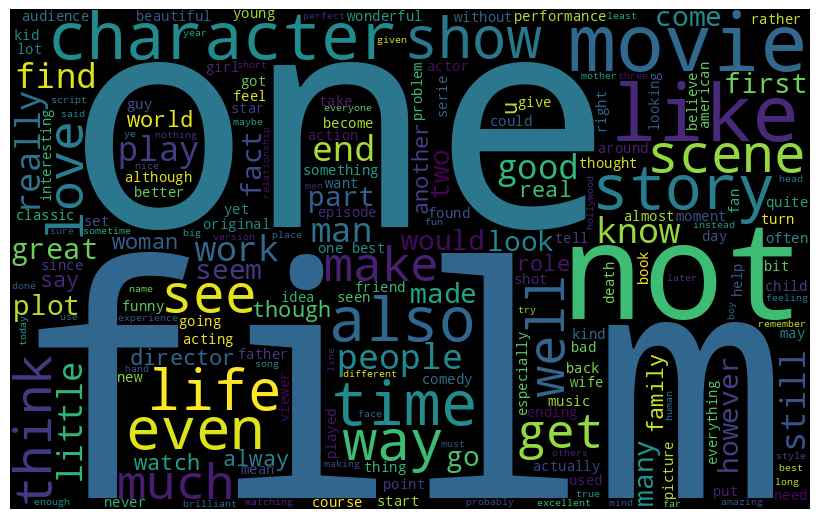

In [16]:
from wordcloud import WordCloud

words_list = df[df['label']==1]['preprocessed_review'].unique().tolist()
pos_words = " ".join(words_list)

pos_wordcloud =  WordCloud(
                  width=800, height = 500,
                  stopwords=stop_words).generate(pos_words)

plt.figure(figsize=(8, 8), facecolor = None)
plt.imshow(pos_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

#Negative Reviews Wordcloud

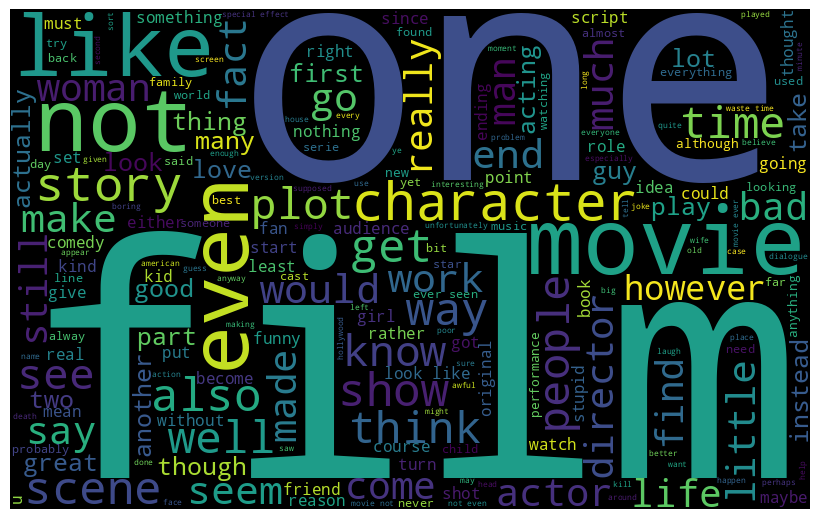

In [17]:
words_list = df[df['label']==0]['preprocessed_review'].unique().tolist()
neg_words = " ".join(words_list)

neg_wordcloud =  WordCloud(
                  width=800, height = 500,
                  stopwords=stop_words).generate(neg_words)

plt.figure(figsize=(8, 8), facecolor = None)
plt.imshow(neg_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


#Splitting the data set into train and test(70–30):

In [18]:
from sklearn.model_selection import train_test_split

data = df.copy()
y = data['label'].values
data.drop(['label'], axis=1, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3, stratify=y)

print("Train data:",  X_train.shape, y_train.shape)
print("Test data:",  X_test.shape, y_test.shape)

Train data: (35000, 2) (35000,)
Test data: (15000, 2) (15000,)


#3. Vectorizing Text(reviews)

#BOW

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(min_df=10)

X_train_review_bow = vect.fit_transform(X_train['preprocessed_review'])
X_test_review_bow = vect.transform(X_test['preprocessed_review'])

print('X_train_review_bow shape: ', X_train_review_bow.shape)
print('X_test_review_bow shape: ', X_test_review_bow.shape)

X_train_review_bow shape:  (35000, 19516)
X_test_review_bow shape:  (15000, 19516)


#TF-IDF

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=10)

X_train_review_tfidf = vectorizer.fit_transform(X_train['preprocessed_review'])
X_test_review_tfidf = vectorizer.transform(X_test['preprocessed_review'])

print('X_train_review_tfidf shape: ', X_train_review_tfidf.shape)
print('X_test_review_tfidf shape: ', X_test_review_tfidf.shape)

X_train_review_tfidf shape:  (35000, 19516)
X_test_review_tfidf shape:  (15000, 19516)


# 4. Building SVM Classifiers

##### SVM: BOW

In [24]:
from sklearn import svm
from sklearn.metrics import accuracy_score
SVM =svm.SVC ()
SVM.fit(X_train_review_bow, y_train)

predictions_SVM = SVM.predict(X_test_review_bow)

print("Accuracy: ", accuracy_score(y_test, predictions_SVM))

Accuracy:  0.8804666666666666


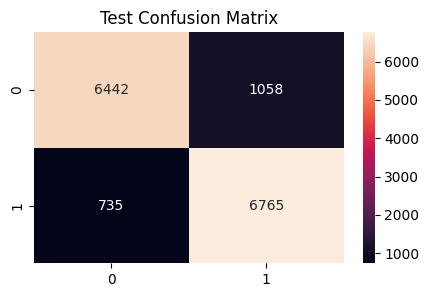

In [25]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, predictions_SVM)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.show()

# SVM: TFIDF

In [26]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
SVM =svm.SVC ()
SVM.fit(X_train_review_tfidf, y_train)

predictions_SVM = SVM.predict(X_test_review_tfidf)
print('Test Accuracy: ', accuracy_score(y_test, predictions_SVM))

Test Accuracy:  0.8986


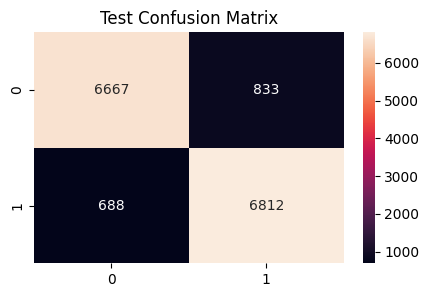

In [29]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, predictions_SVM)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.show()

In [44]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [46]:
# Set the maximum number of words to consider as features
max_features = 10000

# Load the IMDb movie review dataset
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)

# Set the maximum length of each review (number of words)
maxlen = 200

# Pad sequences to have the same length
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)

# Create the LSTM-based RNN model
model = Sequential()
model.add(Embedding(max_features, 128, input_length=maxlen))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=5, validation_data=(X_test, y_test))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/5
782/782 [==============================] - 642s 815ms/step - loss: 0.4232 - accuracy: 0.8030 - val_loss: 0.3456 - val_accuracy: 0.8598
Epoch 2/5
782/782 [==============================] - 619s 792ms/step - loss: 0.2611 - accuracy: 0.8984 - val_loss: 0.3376 - val_accuracy: 0.8584
Epoch 3/5
782/782 [==============================] - 612s 783ms/step - loss: 0.1932 - accuracy: 0.9262 - val_loss: 0.3440 - val_accuracy: 0.8663
Epoch 4/5
782/782 [==============================] - 611s 781ms/step - loss: 0.1378 - accuracy: 0.9508 - val_loss: 0.4541 - val_accuracy: 0.8556
Epoch 5/5
782/782 [==============================] - 74s 95ms/step - loss: 0.4454 - accuracy: 0.8300
Test Loss: 0.4454045593738556
Test Accuracy: 0.8300399780273438
